# Sound Audio Processing 



In [13]:
import librosa, librosa.display
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np 

file ="Data/genres_original/blues/blues.00000.wav"

signal, sr = librosa.load(file,sr=22050) # sr* T = 22050 * 30
signal.size

661794

plt.figure(figsize=(10,6))
librosa.display.waveplot(signal, sr=sr)
plt.xlabel('Time')
plt.ylabel('Amplititude')
plt.show()

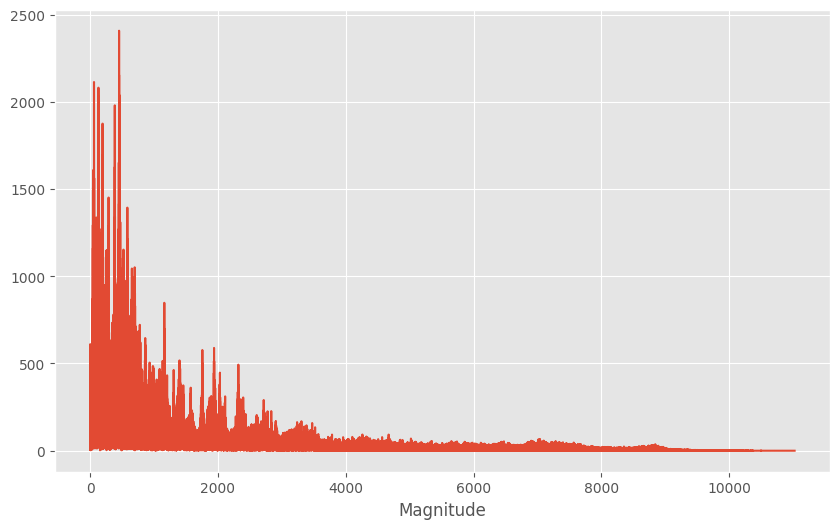

661794


In [14]:
## FT 

fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0,sr,len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]


plt.figure(figsize=(10,6))
plt.plot(left_frequency, left_magnitude)
plt.xlabel('Frequency')
plt.xlabel('Magnitude')
plt.show()

print(len(frequency))



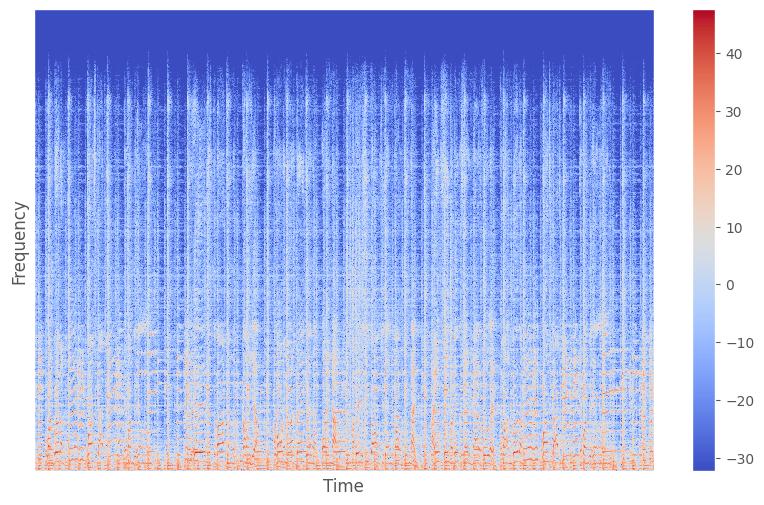

In [15]:
n_fft = 2048 ## no of samples per fft
hop_length = 512
stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)

spectogram = np.abs(stft)

log_spectogram = librosa.amplitude_to_db(spectogram)

#plotting 
plt.figure(figsize=(10,6))
librosa.display.specshow(log_spectogram, sr=sr, hop_length=hop_length)



plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

In [16]:
signal

array([ 0.00732422,  0.01660156,  0.00762939, ..., -0.05560303,
       -0.06106567, -0.06417847], dtype=float32)

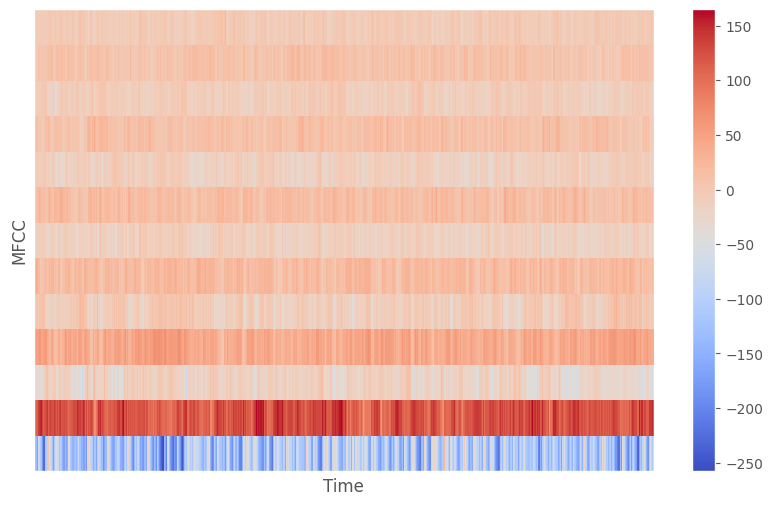

In [17]:
MFFCs = librosa.feature.mfcc(y=signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

#plotting 
plt.figure(figsize=(10,6))
librosa.display.specshow(data=MFFCs, sr=sr, hop_length=hop_length)



plt.xlabel('Time')
plt.ylabel('MFCC')
plt.colorbar()
plt.show()

# Preprocessing Dataset


!wget http://opihi.cs.uvic.ca/sound/genres.tar.gz

!tar xvzf genres.tar.gz

In [18]:
import pandas as pd

foldData = pd.read_excel('Data/FoldData.xlsx')

In [19]:
foldData

,Id,5_Fold,Genre,Song
0,1,1,blu,blues.00000.wav
1,2,2,blu,blues.00001.wav
2,3,3,blu,blues.00004.wav
3,4,4,blu,blues.00005.wav
4,5,5,blu,blues.00007.wav
...,...,...,...,...
295,26,1,roc,rock.00085.wav
296,27,2,roc,rock.00086.wav
297,28,3,roc,rock.00087.wav
298,29,4,roc,rock.00088.wav


In [20]:
dataList = foldData[foldData['5_Fold'] == 1].reset_index(drop=True)['Song'].to_list()

In [21]:
temp = ['blues.00000.wav', 'blues.00001.wav', 'blues.00004.wav', 'blues.00005.wav', 'blues.00007.wav', 'blues.00008.wav', 'blues.00012.wav', 'blues.00013.wav', 'blues.00019.wav', 'blues.00024.wav', 'blues.00025.wav', 'blues.00030.wav', 'blues.00032.wav', 'blues.00043.wav', 'blues.00047.wav', 'blues.00050.wav', 'blues.00060.wav', 'blues.00061.wav', 'blues.00062.wav', 'blues.00063.wav', 'blues.00065.wav', 'blues.00067.wav', 'blues.00069.wav', 'blues.00070.wav', 'blues.00071.wav', 'blues.00072.wav', 'blues.00073.wav', 'blues.00075.wav', 'blues.00076.wav', 'blues.00077.wav', 'blues.00078.wav', 'blues.00081.wav', 'blues.00082.wav', 'blues.00099.wav']

In [22]:
[x for x in dataList if x in temp]

['blues.00000.wav',
 'blues.00008.wav',
 'blues.00025.wav',
 'blues.00050.wav',
 'blues.00065.wav',
 'blues.00072.wav']

import librosa
file ="Data/genres_original/hiphop/hiphop.00032.wav"
SAMPLES_PER_TRACK = SAMPLE_RATE * librosa.get_duration(filename=file)
print(SAMPLES_PER_TRACK)

from pydub import AudioSegment
newAudio = AudioSegment.from_wav("Data/genres_paper/reggae/reggae.00001.wav")
duration = librosa.get_duration(filename=("Data/genres_paper/reggae/reggae.00001.wav"))
newAudio = newAudio[0:(duration*1000-10)]
newAudio.export('reggae.00001.wav', format="wav") #Exports to a wav file in the current path

In [114]:
import os
import librosa
import math 
import json
from pprint import pprint
from tqdm import tqdm

In [213]:
import os
import librosa
import math 
import json
from pprint import pprint
from tqdm import tqdm
DATASET_PATH = "Data/genres_original"
JSON_PATH = "data.json"
SAMPLE_RATE = 22050
#DURATION = 30 #measured by seconds 
#SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION
def save_mfcc(dataset_path,json_path, fold, n_mfcc=13,n_fft=2048,hop_length=512, num_segments=5):
  # dictionary to store data 
  # data = {
  #     "mapping" : ["classical","blues"],
  #     "mfcc" : [ [...], [...], [...]  ],
  #     "labels" : [0,0,1],
  # }

  data = {
      "mapping" : [],
      "mfcc" : [],
      "labels" : [],
  }



  for i, (dirpath,dirname,filenames) in (enumerate(os.walk(dataset_path))):

    dataList = foldData[foldData['5_Fold'] != fold].reset_index(drop=True)['Song'].to_list()
    filenames = [x for x in dataList if x in filenames]
    print(f"# of files: {len(filenames)}")
      
    # ensure we are not at the root level
    if (dirpath) is not dataset_path:
      #Save the semantic label
      dirpath_components = dirpath.split('/') # genre/blues = ["genre", "blues"]
      semantic_label = dirpath_components[-1]
      data["mapping"].append(semantic_label)
      
      pprint(f"Processing {semantic_label}")
      # process files for specific genre
      print(filenames)
      for f in tqdm(filenames):
        #print(f)
        try:
            duration = 30 #librosa.get_duration(filename=f'Data/{semantic_label}/{f}') #30 #
            SAMPLES_PER_TRACK = SAMPLE_RATE * duration
            num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
            expected_n_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length)
        
            file_path = os.path.join(dirpath,f)
            signal,sr = librosa.load(file_path, sr=SAMPLE_RATE)
            
            # process segments, extracting mfcc, storing data
            for s in range(num_segments):
              start_sample = num_samples_per_segment * s  # s= 0 -> 0
              finish_sample = start_sample + num_samples_per_segment  # s =0 -> num_samples_per_segment
    
    
    
              mfcc = librosa.feature.mfcc(y=signal[start_sample:finish_sample], 
                                          sr=sr,
                                          n_fft= n_fft,
                                          n_mfcc=n_mfcc,
                                          hop_length=hop_length
                                          )
              mfcc = mfcc.T
    
              #Store if expected == mfcc length
              if(len(mfcc) == expected_n_mfcc_vectors_per_segment):
                data["mfcc"].append(mfcc.tolist())
                data["labels"].append(i-1)

              else:
                print("---ERROR---")
                print(f'file: {f} -- len(mfcc): {len(mfcc)} and expected: {expected_n_mfcc_vectors_per_segment}')
                data["mfcc"].append(mfcc.tolist())
                data["labels"].append(i-1)
        except:   
           print(f) 
          
  with open(json_path, "w") as fp:
    json.dump(data,fp,indent=4)

In [214]:
save_mfcc(DATASET_PATH, JSON_PATH, fold=1, num_segments=10)

# of files: 0
# of files: 24
'Processing genres_original\\blues'
['blues.00001.wav', 'blues.00004.wav', 'blues.00005.wav', 'blues.00007.wav', 'blues.00012.wav', 'blues.00013.wav', 'blues.00019.wav', 'blues.00024.wav', 'blues.00030.wav', 'blues.00032.wav', 'blues.00043.wav', 'blues.00047.wav', 'blues.00060.wav', 'blues.00061.wav', 'blues.00062.wav', 'blues.00063.wav', 'blues.00067.wav', 'blues.00069.wav', 'blues.00070.wav', 'blues.00071.wav', 'blues.00073.wav', 'blues.00075.wav', 'blues.00076.wav', 'blues.00077.wav']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.26it/s]


# of files: 24
'Processing genres_original\\classical'
['classical.00002.wav', 'classical.00005.wav', 'classical.00006.wav', 'classical.00007.wav', 'classical.00023.wav', 'classical.00026.wav', 'classical.00039.wav', 'classical.00041.wav', 'classical.00052.wav', 'classical.00053.wav', 'classical.00054.wav', 'classical.00058.wav', 'classical.00063.wav', 'classical.00070.wav', 'classical.00071.wav', 'classical.00072.wav', 'classical.00075.wav', 'classical.00076.wav', 'classical.00078.wav', 'classical.00079.wav', 'classical.00086.wav', 'classical.00090.wav', 'classical.00091.wav', 'classical.00092.wav']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.91it/s]


# of files: 24
'Processing genres_original\\country'
['country.00004.wav', 'country.00005.wav', 'country.00007.wav', 'country.00010.wav', 'country.00012.wav', 'country.00015.wav', 'country.00016.wav', 'country.00017.wav', 'country.00043.wav', 'country.00052.wav', 'country.00054.wav', 'country.00055.wav', 'country.00068.wav', 'country.00070.wav', 'country.00071.wav', 'country.00072.wav', 'country.00074.wav', 'country.00075.wav', 'country.00076.wav', 'country.00078.wav', 'country.00088.wav', 'country.00089.wav', 'country.00090.wav', 'country.00091.wav']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.49it/s]


# of files: 24
'Processing genres_original\\disco'
['disco.00001.wav', 'disco.00005.wav', 'disco.00006.wav', 'disco.00007.wav', 'disco.00010.wav', 'disco.00011.wav', 'disco.00013.wav', 'disco.00014.wav', 'disco.00016.wav', 'disco.00027.wav', 'disco.00031.wav', 'disco.00032.wav', 'disco.00037.wav', 'disco.00041.wav', 'disco.00045.wav', 'disco.00046.wav', 'disco.00071.wav', 'disco.00072.wav', 'disco.00073.wav', 'disco.00075.wav', 'disco.00077.wav', 'disco.00078.wav', 'disco.00079.wav', 'disco.00093.wav']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.69it/s]


# of files: 24
'Processing genres_original\\hiphop'
['hiphop.00001.wav', 'hiphop.00002.wav', 'hiphop.00003.wav', 'hiphop.00004.wav', 'hiphop.00006.wav', 'hiphop.00007.wav', 'hiphop.00009.wav', 'hiphop.00010.wav', 'hiphop.00012.wav', 'hiphop.00013.wav', 'hiphop.00015.wav', 'hiphop.00017.wav', 'hiphop.00019.wav', 'hiphop.00020.wav', 'hiphop.00023.wav', 'hiphop.00026.wav', 'hiphop.00031.wav', 'hiphop.00032.wav', 'hiphop.00033.wav', 'hiphop.00037.wav', 'hiphop.00039.wav', 'hiphop.00041.wav', 'hiphop.00042.wav', 'hiphop.00058.wav']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.76it/s]


# of files: 24
'Processing genres_original\\jazz'
['jazz.00003.wav', 'jazz.00004.wav', 'jazz.00005.wav', 'jazz.00006.wav', 'jazz.00008.wav', 'jazz.00009.wav', 'jazz.00010.wav', 'jazz.00012.wav', 'jazz.00014.wav', 'jazz.00016.wav', 'jazz.00017.wav', 'jazz.00019.wav', 'jazz.00022.wav', 'jazz.00023.wav', 'jazz.00024.wav', 'jazz.00025.wav', 'jazz.00028.wav', 'jazz.00029.wav', 'jazz.00030.wav', 'jazz.00032.wav', 'jazz.00034.wav', 'jazz.00035.wav', 'jazz.00036.wav', 'jazz.00038.wav']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.76it/s]


# of files: 24
'Processing genres_original\\metal'
['metal.00001.wav', 'metal.00002.wav', 'metal.00003.wav', 'metal.00004.wav', 'metal.00006.wav', 'metal.00007.wav', 'metal.00009.wav', 'metal.00010.wav', 'metal.00015.wav', 'metal.00016.wav', 'metal.00017.wav', 'metal.00020.wav', 'metal.00022.wav', 'metal.00024.wav', 'metal.00025.wav', 'metal.00026.wav', 'metal.00032.wav', 'metal.00044.wav', 'metal.00055.wav', 'metal.00089.wav', 'metal.00091.wav', 'metal.00092.wav', 'metal.00093.wav', 'metal.00094.wav']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.72it/s]


# of files: 24
'Processing genres_original\\pop'
['pop.00003.wav', 'pop.00004.wav', 'pop.00005.wav', 'pop.00007.wav', 'pop.00020.wav', 'pop.00023.wav', 'pop.00024.wav', 'pop.00025.wav', 'pop.00027.wav', 'pop.00028.wav', 'pop.00030.wav', 'pop.00032.wav', 'pop.00035.wav', 'pop.00036.wav', 'pop.00039.wav', 'pop.00043.wav', 'pop.00049.wav', 'pop.00052.wav', 'pop.00072.wav', 'pop.00084.wav', 'pop.00086.wav', 'pop.00092.wav', 'pop.00094.wav', 'pop.00095.wav']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.05it/s]


# of files: 24
'Processing genres_original\\reggae'
['reggae.00001.wav', 'reggae.00002.wav', 'reggae.00003.wav', 'reggae.00004.wav', 'reggae.00009.wav', 'reggae.00010.wav', 'reggae.00011.wav', 'reggae.00012.wav', 'reggae.00020.wav', 'reggae.00024.wav', 'reggae.00031.wav', 'reggae.00039.wav', 'reggae.00047.wav', 'reggae.00049.wav', 'reggae.00050.wav', 'reggae.00052.wav', 'reggae.00061.wav', 'reggae.00068.wav', 'reggae.00080.wav', 'reggae.00083.wav', 'reggae.00085.wav', 'reggae.00086.wav', 'reggae.00092.wav', 'reggae.00094.wav']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  4.83it/s]


# of files: 24
'Processing genres_original\\rock'
['rock.00012.wav', 'rock.00031.wav', 'rock.00035.wav', 'rock.00037.wav', 'rock.00039.wav', 'rock.00042.wav', 'rock.00043.wav', 'rock.00044.wav', 'rock.00047.wav', 'rock.00051.wav', 'rock.00056.wav', 'rock.00057.wav', 'rock.00061.wav', 'rock.00064.wav', 'rock.00065.wav', 'rock.00066.wav', 'rock.00073.wav', 'rock.00077.wav', 'rock.00080.wav', 'rock.00082.wav', 'rock.00086.wav', 'rock.00087.wav', 'rock.00088.wav', 'rock.00090.wav']


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.47it/s]


In [215]:
DATASET_PATH = "Data/genres_original"
JSON_PATH = "dataTest.json"
SAMPLE_RATE = 22050
#DURATION = 30 #measured by seconds 
#SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION
def save_mfcc_val(dataset_path,json_path, fold, n_mfcc=13,n_fft=2048,hop_length=512, num_segments=5):
  # dictionary to store data 
  # data = {
  #     "mapping" : ["classical","blues"],
  #     "mfcc" : [ [...], [...], [...]  ],
  #     "labels" : [0,0,1],
  # }

  data = {
      "mapping" : [],
      "mfcc" : [],
      "labels" : [],
  }



  for i, (dirpath,dirname,filenames) in (enumerate(os.walk(dataset_path))):

    dataList = foldData[foldData['5_Fold'] == fold].reset_index(drop=True)['Song'].to_list()
    filenames = [x for x in dataList if x in filenames]
    print(f"# of files: {len(filenames)}")
      
    # ensure we are not at the root level
    if (dirpath) is not dataset_path:
      #Save the semantic label
      dirpath_components = dirpath.split('/') # genre/blues = ["genre", "blues"]
      semantic_label = dirpath_components[-1]
      data["mapping"].append(semantic_label)
      
      pprint(f"Processing {semantic_label}")
      # process files for specific genre
      print(filenames)
      for f in tqdm(filenames):
        #print(f)
        try:
            duration = 30 #librosa.get_duration(filename=f'Data/{semantic_label}/{f}') #30 #
            SAMPLES_PER_TRACK = SAMPLE_RATE * duration
            num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
            expected_n_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length)
        
            file_path = os.path.join(dirpath,f)
            signal,sr = librosa.load(file_path, sr=SAMPLE_RATE)
            
            # process segments, extracting mfcc, storing data
            for s in range(num_segments):
              start_sample = num_samples_per_segment * s  # s= 0 -> 0
              finish_sample = start_sample + num_samples_per_segment  # s =0 -> num_samples_per_segment
    
    
    
              mfcc = librosa.feature.mfcc(y=signal[start_sample:finish_sample], 
                                          sr=sr,
                                          n_fft= n_fft,
                                          n_mfcc=n_mfcc,
                                          hop_length=hop_length
                                          )
              mfcc = mfcc.T
    
              #Store if expected == mfcc length
              if(len(mfcc) == expected_n_mfcc_vectors_per_segment):
                data["mfcc"].append(mfcc.tolist())
                data["labels"].append(i-1)
        except:   
           print(f) 
          
  with open(json_path, "w") as fp:
    json.dump(data,fp,indent=4)

In [216]:
save_mfcc_val(DATASET_PATH, JSON_PATH, fold=1, num_segments=10)

# of files: 0
# of files: 6
'Processing genres_original\\blues'
['blues.00000.wav', 'blues.00008.wav', 'blues.00025.wav', 'blues.00050.wav', 'blues.00065.wav', 'blues.00072.wav']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  9.66it/s]


# of files: 6
'Processing genres_original\\classical'
['classical.00001.wav', 'classical.00022.wav', 'classical.00049.wav', 'classical.00060.wav', 'classical.00074.wav', 'classical.00084.wav']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  9.75it/s]


# of files: 6
'Processing genres_original\\country'
['country.00001.wav', 'country.00011.wav', 'country.00029.wav', 'country.00056.wav', 'country.00073.wav', 'country.00086.wav']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 10.99it/s]


# of files: 6
'Processing genres_original\\disco'
['disco.00000.wav', 'disco.00008.wav', 'disco.00015.wav', 'disco.00033.wav', 'disco.00070.wav', 'disco.00076.wav']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 10.44it/s]


# of files: 6
'Processing genres_original\\hiphop'
['hiphop.00000.wav', 'hiphop.00005.wav', 'hiphop.00011.wav', 'hiphop.00018.wav', 'hiphop.00030.wav', 'hiphop.00038.wav']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  9.14it/s]


# of files: 6
'Processing genres_original\\jazz'
['jazz.00002.wav', 'jazz.00007.wav', 'jazz.00013.wav', 'jazz.00020.wav', 'jazz.00026.wav', 'jazz.00033.wav']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  8.98it/s]


# of files: 6
'Processing genres_original\\metal'
['metal.00000.wav', 'metal.00005.wav', 'metal.00014.wav', 'metal.00021.wav', 'metal.00031.wav', 'metal.00090.wav']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  9.28it/s]


# of files: 6
'Processing genres_original\\pop'
['pop.00001.wav', 'pop.00008.wav', 'pop.00026.wav', 'pop.00034.wav', 'pop.00044.wav', 'pop.00085.wav']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  9.05it/s]


# of files: 6
'Processing genres_original\\reggae'
['reggae.00000.wav', 'reggae.00005.wav', 'reggae.00015.wav', 'reggae.00046.wav', 'reggae.00053.wav', 'reggae.00084.wav']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  9.37it/s]


# of files: 6
'Processing genres_original\\rock'
['rock.00011.wav', 'rock.00038.wav', 'rock.00045.wav', 'rock.00059.wav', 'rock.00068.wav', 'rock.00085.wav']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  8.76it/s]


# Building NN for Classification

In [28]:
# Libraries
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt 

In [29]:
# CONSTANTS
DATASET_PATH ="data.json"

In [30]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

# Load the data 
def load_data(dataset_path):
  with open(dataset_path, "r") as fp:
    data = json.load(fp)

    # convert lists into numpy array
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])

    return inputs, targets


inputs, targets = load_data(DATASET_PATH)

In [31]:
inputs.shape

(2400,)

In [32]:
targets

array([0, 0, 0, ..., 9, 9, 9])

In [33]:
inputs[0][1]

[-621.310546875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [34]:
temp = np.zeros((2400, 374, 13))

try:
    tst = 0 
    for i in range(0, len(inputs)):
        for j in range(0, len(inputs[i])):
            if j < 374:
                for k in range(0, len(inputs[i][j])):
                    temp[i][j][k] = inputs[i][j][k]
except:
    print(i, "-", j, "-", k)

In [38]:
len(temp[0])

374

In [ ]:
temp = np.zeros((2400, 3540, 13))
temp

In [247]:
try:
    tst = 0 
    for i in range(0, len(inputs)):
        for j in range(0, len(inputs[i])):
            for k in range(0, len(inputs[i][j])):
                temp[i][j][k] = inputs[i][j][k]
except:
    print(i, "-", j, "-", k)

#temp = temp.reshape(240, 35400, 13)

240 - 0 - 0


In [206]:
temp.shape

(240, 35400, 13)

In [205]:
temp = temp.reshape(240, 35400, 13)

In [173]:
max = 0
for i in range(0, len(inputs)):
    if max < len(inputs[i]):
        max = len(inputs[i])
print (max)

3540


In [163]:
max = 0
for i in range(0, len(inputs)):
    if max < len(inputs[i]):
        max = len(inputs[i])
print (max)

3165


In [36]:
min = 9999
for i in range(0, len(inputs)):
    if len(inputs[i]) < min:
        min = len(inputs[i])
print(min)

374


In [30]:
min = 9999
for i in range(0, len(inputs)):
    if len(inputs[i]) < min:
        min = len(inputs[i])
print(min)

438


In [123]:
inputs.shape

(2400,)

In [ ]:
for

In [141]:
len(inputs[0])

805

In [142]:
805/13

61.92307692307692

In [158]:
for i in range(0, len(inputs[0])):
    if len(inputs[0][i]) != 13:
        print(len(inputs[0][i]))

In [133]:
len(inputs[50])

773

In [119]:
inputs.shape

(600, 130, 13)

inputs.reshape(240,130,13)

In [53]:
len(inputs[1][1])

13

In [117]:
inputs.shape

(2400, 130, 13)

In [118]:
len(inputs)

2400

inputs.reshape(480,1731,13)

In [119]:
targets

array([0, 0, 0, ..., 9, 9, 9])

In [120]:
inputs.shape

(2400, 130, 13)

In [54]:
# Split the data into training and test 

x_train, x_test, y_train, y_test = train_test_split(inputs,targets, test_size=0.3)

In [55]:
inputs.shape[0]

2400

In [56]:
# model 

model = keras.Sequential([
        keras.layers.Flatten(input_shape=(len(inputs[1]), len(inputs[1][1]))) ,      #  inputs.shape[1],inputs.shape[2] 
        keras.layers.Dense(512,activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256,activation="relu" , kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64,activation="relu" , kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(10,activation="softmax"),


])

In [57]:
def plot_history(history):
  figs, axs= plt.subplots(2)

  # accuracy subplot 

  axs[0].plot(history.history["accuracy"], label="train accuracy")
  axs[0].plot(history.history["val_accuracy"], label="test accuracy")
  axs[1].set_xlabel("Epoch")
  axs[0].set_ylabel("Accuracy")
  axs[0].legend(loc="lower right")
  axs[0].set_title('Accuracy Eval') 



  axs[1].plot(history.history["loss"], label="train error")
  axs[1].plot(history.history["val_accuracy"], label="test error")
  axs[1].set_xlabel("Epoch")
  axs[1].set_ylabel("Label")

  axs[1].legend(loc="upper right")
  axs[1].set_title('Error Eval') 

  plt.show()


In [58]:
# compilation 

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=50, batch_size=32)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10465)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               5358592   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)               

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

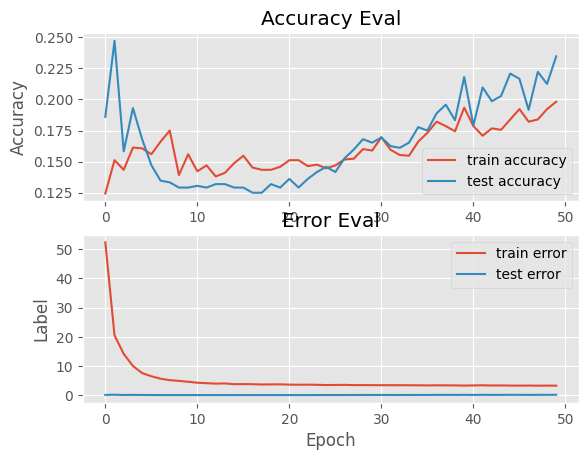

In [127]:
plot_history(history)

# Music Classification using CNN

In [217]:
# Libraries
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt 
from keras import backend as K

# CONSTANTS
DATASET_PATH ="data.json"
DATASET_PATH_TEST ="dataTest.json"
DATASET_PATH_TRAIN ="dataTrain.json"

# Load the data 
def load_data(dataset_path):
  with open(dataset_path, "r") as fp:
    data = json.load(fp)

    # convert lists into numpy array
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])

#    if dataset_path == "data.json":
#        # temp = np.zeros((2400, 3540, 13))
#        temp = np.zeros((2400, 374, 13))
#        try:
#            for i in range(0, len(inputs)):
#                for j in range(0, len(inputs[i])):
#                    if j < 374:
#                        for k in range(0, len(inputs[i][j])):
#                            temp[i][j][k] = inputs[i][j][k]
#        except:
#            print(i, "-", j, "-", k)
#            
#    elif dataset_path == "dataTest.json":
#        #temp = np.zeros((600, 3540, 13))
#        temp = np.zeros((600, 374, 13))
#        try:
#            for i in range(0, len(inputs)):
#                for j in range(0, len(inputs[i])):
#                    if j < 374:
#                        for k in range(0, len(inputs[i][j])):
#                            temp[i][j][k] = inputs[i][j][k]
#        except:
#            print(i, "-", j, "-", k) 

    
    #temp = temp.reshape(240, 35400, 13)

#    return temp, targets # inputs, targets
    return inputs, targets # inputs, targets


def prepare_datasets(test_size,val_size):
  X_train, y_train= load_data(DATASET_PATH_TRAIN)    
  X_val, y_val= load_data(DATASET_PATH)
  X_test, y_test= load_data(DATASET_PATH_TEST)

 # X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size)
 # X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size)
    
  #X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=val_size)
  
  # CNN expects a 3d array , (130, 3 ,1 )

  X_train = X_train[..., np.newaxis]
  X_val = X_val[..., np.newaxis]
  X_test = X_test[..., np.newaxis]

  return X_train, X_val, X_test ,y_train, y_val, y_test




def plot_history(history):
  figs, axs= plt.subplots(2)

  # accuracy subplot 

  axs[0].plot(history.history["accuracy"], label="train accuracy")
  axs[0].plot(history.history["val_accuracy"], label="test accuracy")
  axs[1].set_xlabel("Epoch")
  axs[0].set_ylabel("Accuracy")
  axs[0].legend(loc="lower right")
  axs[0].set_title('Accuracy Eval') 



  axs[1].plot(history.history["loss"], label="train error")
  axs[1].plot(history.history["val_accuracy"], label="test error")
  axs[1].set_xlabel("Epoch")
  axs[1].set_ylabel("Loss")

  axs[1].legend(loc="upper right")
  axs[1].set_title('Error Eval') 

  plt.show()


In [218]:
def build_model(input_shape):

  model = keras.Sequential()

  #1st conv layer and pooling layer
  model.add(keras.layers.Conv2D(32,(3,3),activation="relu", input_shape=input_shape))
  model.add(keras.layers.MaxPool2D((3,3), strides=(2,2), padding="same"))
  model.add(keras.layers.BatchNormalization())

  #2nd conv layer and pooling layer

  model.add(keras.layers.Conv2D(32,(3,3),activation="relu", input_shape=input_shape))
  model.add(keras.layers.MaxPool2D((3,3), strides=(2,2), padding="same"))
  model.add(keras.layers.BatchNormalization())


  #3rd conv layer and pooling layer


  model.add(keras.layers.Conv2D(32,(2,2),activation="relu", input_shape=input_shape))
  model.add(keras.layers.MaxPool2D((2,2), strides=(2,2), padding="same"))
  model.add(keras.layers.BatchNormalization())

  #flatten and feed to dense
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(64, activation="relu"))  
  model.add(keras.layers.Dropout(0.3))
  #softmax output 

  model.add(keras.layers.Dense(10, activation="softmax"))
  return model

In [219]:
def predict(model,X,y):
  X = X[np.newaxis, ...]

  pred = model.predict(X)
  predicted_index = np.argmax(pred, axis=1)
  print(f"Prediction is: {predicted_index[0]}")
  print(f"Expected is: {y}")


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 64, 6, 32)         0         
 ng2D)                                                           
                                                                 
 batch_normalization_12 (Ba  (None, 64, 6, 32)         128       
 tchNormalization)                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 31, 2, 32)         0         
 ng2D)                                                           
                                                     

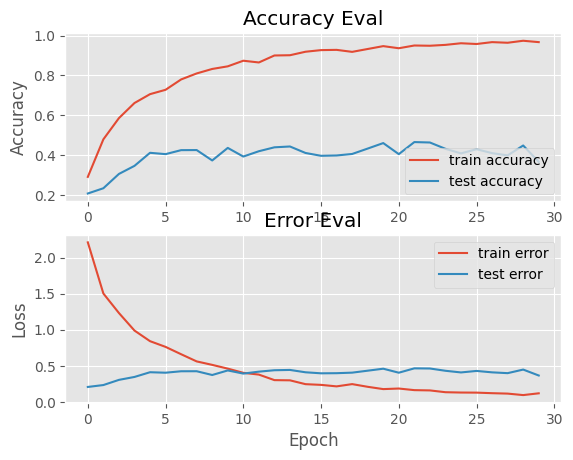

In [220]:
if __name__ == "__main__":
  X_train, X_val, X_test, y_train, y_val, y_test = prepare_datasets(0.25, 0.2)

  # model 
  input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])

  model = build_model(input_shape)

  # compilation
  optimizer = keras.optimizers.Adam(learning_rate=0.001)

  model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy", metrics=["accuracy"])
  model.summary()
  history = model.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size=32, epochs=30)

  # evaluate 

  test_error, test_accuracy = model.evaluate(X_test,y_test, verbose=1)

  print(f"Accuracy on test set is: {test_accuracy}")
  print(f"Error on test set is: {test_error}")


  plot_history(history)


  #X = X_test[106]
  #y= y_test[106]
  #predict(model,X,y)

In [221]:
test_error, test_accuracy = model.evaluate(X_train,y_train, verbose=1)
print(f"Accuracy on train set is: {test_accuracy}")
print(f"Error on train set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_val,y_val, verbose=1)
print(f"Accuracy on val set is: {test_accuracy}")
print(f"Error on val set is: {test_error}")

50/50 [==============================] - 0s 6ms/step - loss: 0.0935 - accuracy: 0.9725
Accuracy on train set is: 0.9725000262260437
Error on train set is: 0.09351638704538345
75/75 [==============================] - 1s 7ms/step - loss: 4.4498 - accuracy: 0.3671
Accuracy on val set is: 0.367083340883255
Error on val set is: 4.44983434677124


# Music Genre Classification RNN-LSTM

In [222]:
import keras_tuner as kt
from tensorflow import keras

def prepare_datasets(test_size, val_size):
    X, y = load_data(DATASET_PATH)
    X_test, y_test = load_data(DATASET_PATH_TEST)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size)
    return X_train, X_val, X_test, y_train, y_val, y_test

Reloading Tuner from hyperparam_tuning\lstm_tuning\tuner0.json
Epoch 1/30
60/60 [==============================] - 20s 241ms/step - loss: 2.1136 - accuracy: 0.2708 - val_loss: 1.8823 - val_accuracy: 0.3896
Epoch 2/30
60/60 [==============================] - 13s 222ms/step - loss: 1.6700 - accuracy: 0.4786 - val_loss: 1.4647 - val_accuracy: 0.5208
Epoch 3/30
60/60 [==============================] - 16s 263ms/step - loss: 1.3512 - accuracy: 0.5688 - val_loss: 1.3360 - val_accuracy: 0.5292
Epoch 4/30
60/60 [==============================] - 14s 231ms/step - loss: 1.2003 - accuracy: 0.6047 - val_loss: 1.2358 - val_accuracy: 0.5542
Epoch 5/30
60/60 [==============================] - 18s 293ms/step - loss: 1.1190 - accuracy: 0.6323 - val_loss: 1.2345 - val_accuracy: 0.5604
Epoch 6/30
60/60 [==============================] - 17s 291ms/step - loss: 1.0194 - accuracy: 0.6682 - val_loss: 1.1212 - val_accuracy: 0.6104
Epoch 7/30
60/60 [==============================] - 13s 225ms/step - loss: 0.88

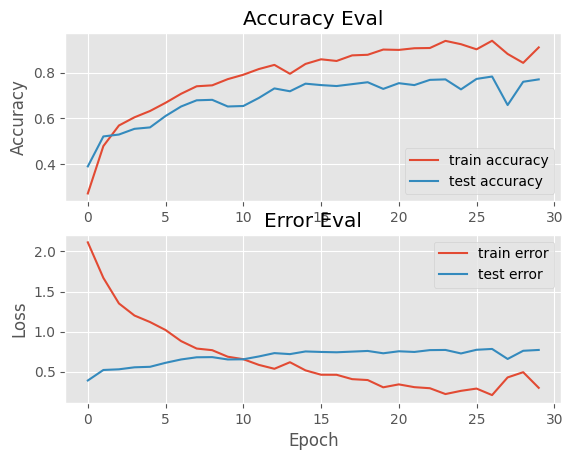

1/1 [==============================] - 1s 1s/step
Prediction is: 1
Expected is: 1


In [223]:
import keras_tuner as kt
from tensorflow import keras

def prepare_datasets(test_size, val_size):
    X, y = load_data(DATASET_PATH)
    X_test, y_test = load_data(DATASET_PATH_TEST)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size)
    return X_train, X_val, X_test, y_train, y_val, y_test

def build_model(hp):
    """Generates RNN-LSTM Model with hyperparameter tuning
    
    :param hp: hyperparameters from KerasTuner
    :return model: RNN-LSTM Model
    """
    model = keras.Sequential()

    # Tune the number of units in each LSTM layer
    for i in range(3):
        model.add(
            keras.layers.LSTM(
                units=hp.Int(f"units_{i}", min_value=32, max_value=128, step=32),
                return_sequences=(i < 2),  # Only the last LSTM layer should not return sequences
                input_shape=(None, None) if i > 0 else input_shape
            )
        )

    # Dense layer
    model.add(keras.layers.Dense(64, activation="relu"))

    # Dropout layer with a tunable dropout rate
    model.add(keras.layers.Dropout(rate=hp.Float("dropout", min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(keras.layers.Dense(10, activation="softmax"))

    # Compile the model with a tunable learning rate
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

if __name__ == "__main__":
    X_train, X_val, X_test, y_train, y_val, y_test = prepare_datasets(0.25, 0.2)
    input_shape = (X_train.shape[1], X_train.shape[2])

    tuner = kt.RandomSearch(
        build_model,
        objective="val_accuracy",
        max_trials=5,
        executions_per_trial=2,
        directory="hyperparam_tuning",
        project_name="lstm_tuning"
    )

    tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    model = tuner.hypermodel.build(best_hps)

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                        batch_size=32, epochs=30)

    # Evaluate on test data
    test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print(f"Accuracy on test set is: {test_accuracy}")
    print(f"Error on test set is: {test_error}")

    plot_history(history)

    X = X_test[106]
    y = y_test[106]
    predict(model, X, y)


In [225]:
best_hps.values

{'units_0': 128,
 'units_1': 64,
 'units_2': 32,
 'dropout': 0.2,
 'learning_rate': 0.00046710694505239296}

Epoch 1/30
60/60 [==============================] - 15s 182ms/step - loss: 2.1327 - accuracy: 0.2682 - val_loss: 1.9068 - val_accuracy: 0.3729
Epoch 2/30
60/60 [==============================] - 9s 158ms/step - loss: 1.7376 - accuracy: 0.4469 - val_loss: 1.5371 - val_accuracy: 0.4771
Epoch 3/30
60/60 [==============================] - 11s 184ms/step - loss: 1.4575 - accuracy: 0.5198 - val_loss: 1.3650 - val_accuracy: 0.5479
Epoch 4/30
60/60 [==============================] - 11s 189ms/step - loss: 1.2697 - accuracy: 0.5859 - val_loss: 1.2690 - val_accuracy: 0.5583
Epoch 5/30
60/60 [==============================] - 10s 168ms/step - loss: 1.1166 - accuracy: 0.6292 - val_loss: 1.0987 - val_accuracy: 0.6354
Epoch 6/30
60/60 [==============================] - 10s 171ms/step - loss: 0.9825 - accuracy: 0.6818 - val_loss: 1.2047 - val_accuracy: 0.6000
Epoch 7/30
60/60 [==============================] - 10s 168ms/step - loss: 0.9131 - accuracy: 0.6995 - val_loss: 1.0050 - val_accuracy: 0.6604


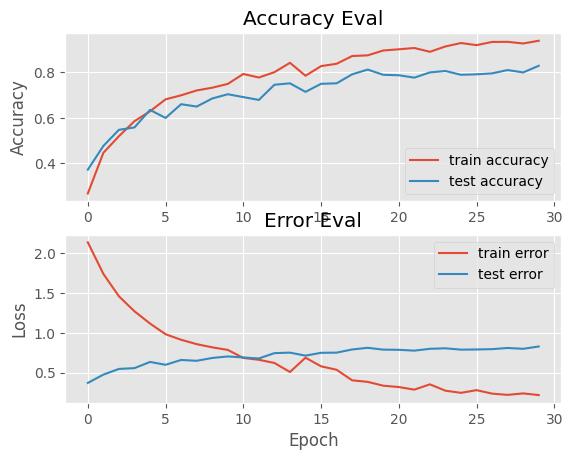

1/1 [==============================] - 1s 1s/step
Prediction is: 1
Expected is: 1


In [76]:
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                        batch_size=32, epochs=30)

    # Evaluate on test data
    test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print(f"Accuracy on test set is: {test_accuracy}")
    print(f"Error on test set is: {test_error}")

    plot_history(history)

    X = X_test[106]
    y = y_test[106]
    predict(model, X, y)

In [226]:
test_error, test_accuracy = model.evaluate(X_train,y_train, verbose=1)
print(f"Accuracy on train set is: {test_accuracy}")
print(f"Error on train set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_val,y_val, verbose=1)
print(f"Accuracy on val set is: {test_accuracy}")
print(f"Error on val set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy on test set is: {test_accuracy}")
print(f"Error on val test is: {test_error}")

60/60 [==============================] - 3s 50ms/step - loss: 0.3431 - accuracy: 0.9010
Accuracy on train set is: 0.9010416865348816
Error on train set is: 0.34306228160858154
15/15 [==============================] - 1s 48ms/step - loss: 0.2708 - accuracy: 0.9208
Accuracy on val set is: 0.9208333492279053
Error on val set is: 0.270790696144104
19/19 [==============================] - 1s 50ms/step - loss: 1.8453 - accuracy: 0.5333
Accuracy on test set is: 0.5333333611488342
Error on val test is: 1.8452789783477783


In [77]:
test_error, test_accuracy = model.evaluate(X_train,y_train, verbose=1)
print(f"Accuracy on train set is: {test_accuracy}")
print(f"Error on train set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_val,y_val, verbose=1)
print(f"Accuracy on val set is: {test_accuracy}")
print(f"Error on val set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy on test set is: {test_accuracy}")
print(f"Error on val test is: {test_error}")

60/60 [==============================] - 5s 78ms/step - loss: 0.1355 - accuracy: 0.9589
Accuracy on train set is: 0.9588541388511658
Error on train set is: 0.1355293095111847
15/15 [==============================] - 1s 85ms/step - loss: 0.5946 - accuracy: 0.8292
Accuracy on val set is: 0.8291666507720947
Error on val set is: 0.5946494936943054
19/19 [==============================] - 1s 63ms/step - loss: 2.0404 - accuracy: 0.5633
Accuracy on test set is: 0.5633333325386047
Error on val test is: 2.040419340133667


In [113]:
test_error, test_accuracy = model.evaluate(X_train,y_train, verbose=1)
print(f"Accuracy on train set is: {test_accuracy}")
print(f"Error on train set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_val,y_val, verbose=1)
print(f"Accuracy on val set is: {test_accuracy}")
print(f"Error on val set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy on test set is: {test_accuracy}")
print(f"Error on val test is: {test_error}")

60/60 [==============================] - 4s 68ms/step - loss: 0.1033 - accuracy: 0.9698
Accuracy on train set is: 0.9697916507720947
Error on train set is: 0.10331456363201141
15/15 [==============================] - 1s 66ms/step - loss: 0.5685 - accuracy: 0.8375
Accuracy on val set is: 0.8374999761581421
Error on val set is: 0.5685304999351501
19/19 [==============================] - 1s 60ms/step - loss: 2.2967 - accuracy: 0.5533
Accuracy on test set is: 0.5533333420753479
Error on val test is: 2.29667592048645


In [127]:
test_error, test_accuracy = model.evaluate(X_train,y_train, verbose=1)
print(f"Accuracy on train set is: {test_accuracy}")
print(f"Error on train set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_val,y_val, verbose=1)
print(f"Accuracy on val set is: {test_accuracy}")
print(f"Error on val set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy on test set is: {test_accuracy}")
print(f"Error on val test is: {test_error}")

60/60 [==============================] - 5s 79ms/step - loss: 0.2160 - accuracy: 0.9302
Accuracy on train set is: 0.9302083253860474
Error on train set is: 0.2160051017999649
15/15 [==============================] - 1s 59ms/step - loss: 0.8387 - accuracy: 0.7812
Accuracy on val set is: 0.78125
Error on val set is: 0.8387351632118225
19/19 [==============================] - 1s 59ms/step - loss: 2.2666 - accuracy: 0.5050
Accuracy on test set is: 0.5049999952316284
Error on val test is: 2.266617774963379


In [139]:
test_error, test_accuracy = model.evaluate(X_train,y_train, verbose=1)
print(f"Accuracy on train set is: {test_accuracy}")
print(f"Error on train set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_val,y_val, verbose=1)
print(f"Accuracy on val set is: {test_accuracy}")
print(f"Error on val set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy on test set is: {test_accuracy}")
print(f"Error on val test is: {test_error}")

60/60 [==============================] - 4s 73ms/step - loss: 0.2434 - accuracy: 0.9318
Accuracy on train set is: 0.9317708611488342
Error on train set is: 0.24341890215873718
15/15 [==============================] - 1s 72ms/step - loss: 0.7886 - accuracy: 0.7563
Accuracy on val set is: 0.7562500238418579
Error on val set is: 0.7885648608207703
19/19 [==============================] - 1s 61ms/step - loss: 1.8979 - accuracy: 0.5900
Accuracy on test set is: 0.5899999737739563
Error on val test is: 1.8978869915008545


In [154]:
test_error, test_accuracy = model.evaluate(X_train,y_train, verbose=1)
print(f"Accuracy on train set is: {test_accuracy}")
print(f"Error on train set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_val,y_val, verbose=1)
print(f"Accuracy on val set is: {test_accuracy}")
print(f"Error on val set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy on test set is: {test_accuracy}")
print(f"Error on val test is: {test_error}")

60/60 [==============================] - 4s 66ms/step - loss: 0.3086 - accuracy: 0.9005
Accuracy on train set is: 0.9005208611488342
Error on train set is: 0.3086012005805969
15/15 [==============================] - 1s 65ms/step - loss: 0.8523 - accuracy: 0.7875
Accuracy on val set is: 0.7875000238418579
Error on val set is: 0.8522716760635376
19/19 [==============================] - 1s 51ms/step - loss: 2.0571 - accuracy: 0.5583
Accuracy on test set is: 0.5583333373069763
Error on val test is: 2.057110071182251


# Music Genre Classification Transformers

Reloading Tuner from transformer_tuning\transformer_model_tuning\tuner0.json
Epoch 1/30
60/60 [==============================] - 14s 146ms/step - loss: 1.9403 - accuracy: 0.3187 - val_loss: 1.6973 - val_accuracy: 0.3792
Epoch 2/30
60/60 [==============================] - 8s 126ms/step - loss: 1.5591 - accuracy: 0.4297 - val_loss: 1.5622 - val_accuracy: 0.4500
Epoch 3/30
60/60 [==============================] - 7s 116ms/step - loss: 1.3901 - accuracy: 0.5073 - val_loss: 1.4907 - val_accuracy: 0.5063
Epoch 4/30
60/60 [==============================] - 7s 121ms/step - loss: 1.2481 - accuracy: 0.5510 - val_loss: 1.3860 - val_accuracy: 0.5271
Epoch 5/30
60/60 [==============================] - 8s 128ms/step - loss: 1.1765 - accuracy: 0.5885 - val_loss: 1.2764 - val_accuracy: 0.5833
Epoch 6/30
60/60 [==============================] - 7s 114ms/step - loss: 1.0241 - accuracy: 0.6328 - val_loss: 1.1990 - val_accuracy: 0.6062
Epoch 7/30
60/60 [==============================] - 8s 126ms/step - lo

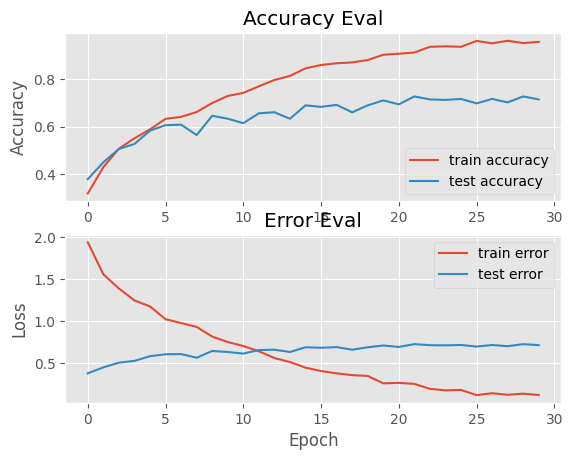

1/1 [==============================] - 1s 693ms/step
Prediction is: 1
Expected is: 1


In [200]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, LayerNormalization, MultiHeadAttention, Embedding, Flatten, Input

def prepare_datasets(test_size, val_size):
    X, y = load_data(DATASET_PATH)
    X_test, y_test = load_data(DATASET_PATH_TEST)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size)
    return X_train, X_val, X_test, y_train, y_val, y_test

class TransformerBlock(keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [Dense(ff_dim, activation="relu"), Dense(embed_dim)]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

def build_transformer_model(hp):
    embed_dim = hp.Choice("embed_dim", [32, 64, 128])  # Embedding size for each token
    num_heads = hp.Choice("num_heads", [2, 4, 8])  # Number of attention heads
    ff_dim = hp.Choice("ff_dim", [32, 64, 128])  # Hidden layer size in the feed-forward network
    num_layers = hp.Int("num_layers", min_value=1, max_value=3, step=1)
    dropout_rate = hp.Float("dropout", min_value=0.1, max_value=0.5, step=0.1)

    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

    # Adjust input dimension to match `embed_dim`
    x = Dense(embed_dim)(inputs)

    # Stack Transformer blocks
    for _ in range(num_layers):
        x = TransformerBlock(embed_dim, num_heads, ff_dim, dropout_rate)(x)

    # Flatten and add a fully connected layer
    x = Flatten()(x)
    x = Dense(64, activation="relu")(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(10, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)

    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model

if __name__ == "__main__":
    X_train, X_val, X_test, y_train, y_val, y_test = prepare_datasets(0.25, 0.2)

    tuner = kt.RandomSearch(
        build_transformer_model,
        objective="val_accuracy",
        max_trials=5,
        executions_per_trial=2,
        directory="transformer_tuning",
        project_name="transformer_model_tuning"
    )

    # Perform hyperparameter tuning
    tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    model = tuner.hypermodel.build(best_hps)

    # Train the final model with the best hyperparameters
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                        batch_size=32, epochs=30)

    # Evaluate on test data
    test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print(f"Accuracy on test set is: {test_accuracy}")
    print(f"Error on test set is: {test_error}")

    plot_history(history)

    X = X_test[106]
    y = y_test[106]
    predict(model, X, y)

In [168]:
test_error, test_accuracy = model.evaluate(X_train,y_train, verbose=1)
print(f"Accuracy on train set is: {test_accuracy}")
print(f"Error on train set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_val,y_val, verbose=1)
print(f"Accuracy on val set is: {test_accuracy}")
print(f"Error on val set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy on test set is: {test_accuracy}")
print(f"Error on val test is: {test_error}")

60/60 [==============================] - 4s 69ms/step - loss: 0.0521 - accuracy: 0.9833
Accuracy on train set is: 0.9833333492279053
Error on train set is: 0.052126552909612656
15/15 [==============================] - 1s 67ms/step - loss: 0.8353 - accuracy: 0.7896
Accuracy on val set is: 0.7895833253860474
Error on val set is: 0.8353295922279358
19/19 [==============================] - 1s 63ms/step - loss: 2.0774 - accuracy: 0.6067
Accuracy on test set is: 0.6066666841506958
Error on val test is: 2.0774240493774414


In [179]:
test_error, test_accuracy = model.evaluate(X_train,y_train, verbose=1)
print(f"Accuracy on train set is: {test_accuracy}")
print(f"Error on train set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_val,y_val, verbose=1)
print(f"Accuracy on val set is: {test_accuracy}")
print(f"Error on val set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy on test set is: {test_accuracy}")
print(f"Error on val test is: {test_error}")

60/60 [==============================] - 5s 89ms/step - loss: 0.0412 - accuracy: 0.9885
Accuracy on train set is: 0.9885416626930237
Error on train set is: 0.041184842586517334
15/15 [==============================] - 1s 67ms/step - loss: 0.8146 - accuracy: 0.8188
Accuracy on val set is: 0.8187500238418579
Error on val set is: 0.8145673871040344
19/19 [==============================] - 1s 71ms/step - loss: 2.9535 - accuracy: 0.5450
Accuracy on test set is: 0.5450000166893005
Error on val test is: 2.953540325164795


In [190]:
test_error, test_accuracy = model.evaluate(X_train,y_train, verbose=1)
print(f"Accuracy on train set is: {test_accuracy}")
print(f"Error on train set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_val,y_val, verbose=1)
print(f"Accuracy on val set is: {test_accuracy}")
print(f"Error on val set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy on test set is: {test_accuracy}")
print(f"Error on val test is: {test_error}")

60/60 [==============================] - 2s 41ms/step - loss: 0.0384 - accuracy: 0.9891
Accuracy on train set is: 0.989062488079071
Error on train set is: 0.03844777122139931
15/15 [==============================] - 1s 45ms/step - loss: 0.9333 - accuracy: 0.7812
Accuracy on val set is: 0.78125
Error on val set is: 0.93326735496521
19/19 [==============================] - 1s 46ms/step - loss: 3.2032 - accuracy: 0.5750
Accuracy on test set is: 0.574999988079071
Error on val test is: 3.2032358646392822


In [201]:
test_error, test_accuracy = model.evaluate(X_train,y_train, verbose=1)
print(f"Accuracy on train set is: {test_accuracy}")
print(f"Error on train set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_val,y_val, verbose=1)
print(f"Accuracy on val set is: {test_accuracy}")
print(f"Error on val set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy on test set is: {test_accuracy}")
print(f"Error on val test is: {test_error}")

60/60 [==============================] - 3s 57ms/step - loss: 0.0811 - accuracy: 0.9729
Accuracy on train set is: 0.9729166626930237
Error on train set is: 0.08110712468624115
15/15 [==============================] - 1s 65ms/step - loss: 1.3070 - accuracy: 0.7146
Accuracy on val set is: 0.7145833373069763
Error on val set is: 1.307008981704712
19/19 [==============================] - 1s 61ms/step - loss: 2.7482 - accuracy: 0.5867
Accuracy on test set is: 0.5866666436195374
Error on val test is: 2.7482001781463623


In [156]:
test_error, test_accuracy = model.evaluate(X_train,y_train, verbose=1)
print(f"Accuracy on train set is: {test_accuracy}")
print(f"Error on train set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_val,y_val, verbose=1)
print(f"Accuracy on val set is: {test_accuracy}")
print(f"Error on val set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy on test set is: {test_accuracy}")
print(f"Error on val test is: {test_error}")

60/60 [==============================] - 4s 64ms/step - loss: 0.1050 - accuracy: 0.9677
Accuracy on train set is: 0.9677083492279053
Error on train set is: 0.10502495616674423
15/15 [==============================] - 1s 62ms/step - loss: 1.3987 - accuracy: 0.7104
Accuracy on val set is: 0.7104166746139526
Error on val set is: 1.3987160921096802
19/19 [==============================] - 1s 60ms/step - loss: 2.4517 - accuracy: 0.6017
Accuracy on test set is: 0.6016666889190674
Error on val test is: 2.4516727924346924


In [212]:
best_hps.values

{'embed_dim': 32,
 'num_heads': 8,
 'ff_dim': 64,
 'num_layers': 3,
 'dropout': 0.1,
 'learning_rate': 0.0007105147639783914}

# Music Genre Classification using GRU - Gated Recurrent Unit

In [138]:
test_error, test_accuracy = model.evaluate(X_train,y_train, verbose=1)
print(f"Accuracy on train set is: {test_accuracy}")
print(f"Error on train set is: {test_error}")

test_error, test_accuracy = model.evaluate(X_val,y_val, verbose=1)
print(f"Accuracy on val set is: {test_accuracy}")
print(f"Error on val set is: {test_error}")

60/60 [==============================] - 12s 195ms/step - loss: 0.9830 - accuracy: 0.6599
Accuracy on train set is: 0.6598958373069763
Error on train set is: 0.982960045337677
15/15 [==============================] - 3s 181ms/step - loss: 1.2724 - accuracy: 0.5646
Accuracy on val set is: 0.5645833611488342
Error on val set is: 1.272359013557434


In [139]:
def build_model(input_shape):
  """Generates GRU Model
  :param input_shape(tuple): shape of input set
  :return model: GRU Model """

  model = keras.Sequential()

  # 3 GRU Layers
  model.add(keras.layers.GRU(128,input_shape=input_shape ,return_sequences=True))
  model.add(keras.layers.GRU(64,return_sequences=True))
  model.add(keras.layers.GRU(64,return_sequences=True))

  model.add(keras.layers.GRU(64))


  # dense layer
  model.add(keras.layers.Dense(64, activation="relu"))
  model.add(keras.layers.Dense(64, activation="relu"))
  model.add(keras.layers.Dropout(0.2))


  #softmax output 
  model.add(keras.layers.Dense(10, activation="softmax"))
  return model


def prepare_datasets(test_size,val_size):
  X, y = load_data(DATASET_PATH)
  X_test, y_test = load_data(DATASET_PATH_TEST)
    
  X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=val_size)
  
  return X_train, X_val, X_test ,y_train, y_val, y_test

In [140]:
## Metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


(374, 13)
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_16 (GRU)                (None, 374, 128)          54912     
                                                                 
 gru_17 (GRU)                (None, 374, 64)           37248     
                                                                 
 gru_18 (GRU)                (None, 374, 64)           24960     
                                                                 
 gru_19 (GRU)                (None, 64)                24960     
                                                                 
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dropout_15 (Dropout)        (None, 64)    

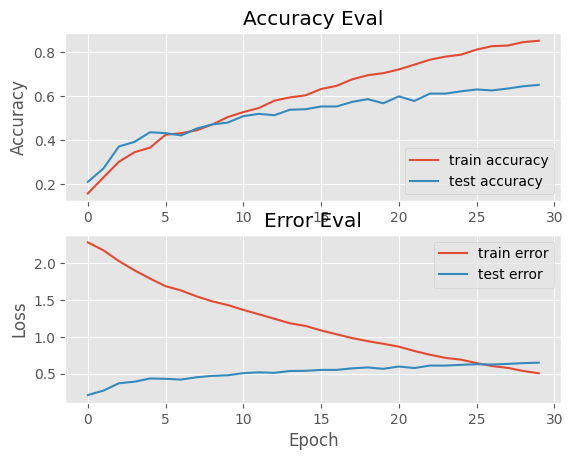

In [141]:
if __name__ == "__main__":
  X_train, X_val, X_test ,y_train, y_val, y_test = prepare_datasets(0.25, 0.20)

  # model 
  input_shape = (X_train.shape[1], X_train.shape[2] )
  print(input_shape)
  model = build_model(input_shape)

  # # compilation
  optimizer = keras.optimizers.Adam(learning_rate=0.0001)

  model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy", metrics=["accuracy", f1_m,precision_m, recall_m])
  model.summary()
  history = model.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size=32, epochs=30)
  plot_history(history)



In [41]:
error, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy on test set is:  {accuracy}")
print(f"Error on test set is: {error}")
print(f"f1_score on test set is: {f1_score}")
print(f"precision on test set is: {precision}")
print(f"recall on test set is: {recall}")

ValueError: not enough values to unpack (expected 5, got 2)

In [42]:
error, accuracy, f1_score, precision, recall = model.evaluate(X_train,y_train, verbose=1)
print(f"Accuracy on train set is: {accuracy}")
print(f"Error on train set is: {error}")

error, accuracy, f1_score, precision, recall  = model.evaluate(X_val,y_val, verbose=1)
print(f"Accuracy on val set is: {accuracy}")
print(f"Error on val set is: {error}")

60/60 [==============================] - 4s 70ms/step - loss: 0.5830 - accuracy: 0.8281


ValueError: not enough values to unpack (expected 5, got 2)